### Kaggle

In [36]:

# подгружаем все необходимые модули
import pandas as pd
import numpy as np
#import sklearn as skl
import matplotlib as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model, preprocessing, ensemble, metrics, svm
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
import xgboost as xgb
#from sklearn.cross_validate import KFold
%pylab inline
#print (skl.__version__)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['shuffle', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [37]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [59]:
# подгружаю датасет
train_data = pd.read_csv('train_Dataset.csv', sep =',')

In [39]:
train_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,labels
0,NaN,NaN,NaN,NaN,NaN,1176.0,7.0,NaN,NaN,NaN,...,VjJAgOW,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,14.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,ELof,3Cy4,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,777.0,7.0,NaN,NaN,NaN,...,jjOYyXX,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1554.0,7.0,NaN,NaN,NaN,...,MHP8mHO,LM8l689qOp,NaN,ELof,7P5s,nIGXDli,F2FyR07IdsN7I,mj86,NaN,1
4,NaN,NaN,NaN,NaN,NaN,980.0,0.0,NaN,NaN,NaN,...,C6OGkwT,LM8l689qOp,NaN,NaN,Xa3G,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1


1. Преобразование данных перед работой с ними.

In [40]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler

In [41]:
#data_true = train_data[train_data['labels'] == 1]
#data_false = train_data[train_data['labels'] == -1]
X = train_data.iloc[:, 0:230].values
y = train_data.iloc[:, -1].values
#from sklearn.utils import shuffle
X = train_data.fillna(0)

In [43]:
#использую OVERsampling, чтобы сделать пропорцию классов 1:1:
os =  RandomOverSampler(sampling_strategy='minority')
X_new, y_new = os.fit_resample(X, y)
x_data = pd.DataFrame(X_new, columns = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12',
                                    'Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23',
                                    'Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31','Var32','Var33','Var34',
                                    'Var35','Var36','Var37','Var38','Var39','Var40','Var41','Var42','Var43','Var44','Var45',
                                    'Var46','Var47','Var48','Var49','Var50','Var51','Var52','Var53','Var54','Var55','Var56',
                                    'Var57','Var58','Var59','Var60','Var61','Var62','Var63','Var64','Var65','Var66','Var67',
                                    'Var68','Var69','Var70','Var71','Var72','Var73','Var74','Var75','Var76','Var77','Var78',
                                    'Var79','Var80','Var81','Var82','Var83','Var84','Var85','Var86','Var87','Var88','Var89',
                                    'Var90','Var91','Var92','Var93','Var94','Var95','Var96','Var97','Var98','Var99','Var100',
                                    'Var101','Var102','Var103','Var104','Var105','Var106','Var107','Var108','Var109','Var110',
                                    'Var111','Var112','Var113','Var114','Var115','Var116','Var117','Var118','Var119','Var120',
                                    'Var121','Var122','Var123','Var124','Var125','Var126','Var127','Var128','Var129','Var130',
                                    'Var131','Var132','Var133','Var134','Var135','Var136','Var137','Var138','Var139','Var140',
                                    'Var141','Var142','Var143','Var144','Var145','Var146','Var147','Var148','Var149','Var150',
                                    'Var151','Var152','Var153','Var154','Var155','Var156','Var157','Var158','Var159','Var160',
                                    'Var161','Var162','Var163','Var164','Var165','Var166','Var167','Var168','Var169','Var170',
                                    'Var171','Var172','Var173','Var174','Var175','Var176','Var177','Var178','Var179','Var180',
                                    'Var181','Var182','Var183','Var184','Var185','Var186','Var187','Var188','Var189','Var190',
                                    'Var191','Var192','Var193','Var194','Var195','Var196','Var197','Var198','Var199','Var200',
                                    'Var201','Var202','Var203','Var204','Var205','Var206','Var207','Var208','Var209','Var210',
                                    'Var211','Var212','Var213','Var214','Var215','Var216','Var217','Var218','Var219','Var220',
                                    'Var221','Var222','Var223','Var224','Var225','Var226','Var227','Var228','Var229','Var230'
                                           ])
y_data = pd.DataFrame(y_new, columns = ['labels'])

In [44]:
# подгружаю тестовые данные для Kaggle
test_kaggle = pd.read_csv('orange_small_churn_test_data.csv', sep=',')
test_kaggle
# удаляю столбец ID
del test_kaggle['ID']
# заполняю пропуски в данных нулями
x_test_kaggle = test_kaggle.fillna(0)
train_data = train_data.fillna(0)

In [45]:
# preprocessing.LabelEncoder для преобразования катагориальных переменных
def labelEncoder(data, kaggle):
    #data = data.fillna(0)
    le = preprocessing.LabelEncoder()
    for m in range(190,230):
        le.fit(data.iloc[:,m].astype(str).append(kaggle.iloc[:,m].astype(str)))
        data.iloc[:,m] = le.transform(data.iloc[:,m].astype(str))
        kaggle.iloc[:,m] = le.transform(kaggle.iloc[:,m].astype(str))
    return data, kaggle

x_data, x_test_kaggle = labelEncoder(x_data, x_test_kaggle)

In [46]:
x_data

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,0.0,0.0,0.0,0.0,0.0,1176.0,7.0,0.0,0.0,0.0,...,4,2010,1,0,0,22,2,8,0,0
1,0.0,0.0,0.0,0.0,0.0,1813.0,14.0,0.0,0.0,0.0,...,6,2499,1,0,1,0,3,25,2,0
2,0.0,0.0,0.0,0.0,0.0,777.0,7.0,0.0,0.0,0.0,...,4,2953,1,0,0,10,2,8,0,0
3,0.0,0.0,0.0,0.0,0.0,1554.0,7.0,0.0,0.0,0.0,...,3,1374,1,0,1,4,4,8,2,0
4,0.0,0.0,0.0,0.0,0.0,980.0,0.0,0.0,0.0,0.0,...,0,727,1,0,0,13,0,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55535,0.0,0.0,0.0,0.0,0.0,840.0,7.0,0.0,0.0,0.0,...,4,790,1,0,0,2,2,8,0,0
55536,0.0,0.0,0.0,0.0,0.0,203.0,0.0,0.0,0.0,0.0,...,4,2236,1,0,0,13,2,8,0,0
55537,0.0,0.0,0.0,0.0,0.0,798.0,14.0,0.0,0.0,0.0,...,4,1927,1,0,1,10,2,8,2,0
55538,0.0,0.0,0.0,0.0,0.0,490.0,0.0,0.0,0.0,0.0,...,0,1431,0,0,0,10,0,11,0,0


In [47]:
x_test_kaggle

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,0.0,0.0,0.0,0.0,0.0,1225.0,7.0,0.0,0.0,0.0,...,6,602,4,0,1,22,1,19,0,0
1,0.0,0.0,0.0,0.0,0.0,896.0,14.0,0.0,0.0,0.0,...,4,1137,1,0,0,22,2,8,0,0
2,0.0,0.0,0.0,0.0,0.0,791.0,7.0,0.0,0.0,0.0,...,4,337,1,0,2,17,2,8,2,0
3,0.0,0.0,0.0,0.0,0.0,2296.0,7.0,0.0,0.0,0.0,...,4,294,4,0,2,17,2,8,1,0
4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,...,4,1381,1,0,0,4,2,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,714.0,7.0,0.0,0.0,0.0,...,6,1569,1,0,1,22,3,11,1,0
9996,0.0,0.0,0.0,0.0,0.0,812.0,7.0,0.0,0.0,0.0,...,4,3496,1,0,1,12,2,2,2,0
9997,0.0,0.0,0.0,0.0,0.0,819.0,7.0,0.0,0.0,0.0,...,4,12,2,0,1,11,2,2,1,0
9998,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,4,1727,1,0,0,19,2,2,0,0


In [48]:
# удаление неинформативных переменных, в которых во всех строках одно и то же значение
def dropUninformative(data):
    df = pd.DataFrame([])
    for i in range(data.shape[1]):
        if len(np.unique(data.iloc[:,i].astype(str)))>1:
            df["Var"+str(i)] = data.iloc[:,i]
    return df
temp = dropUninformative(pd.DataFrame.append(x_data,x_test_kaggle))
# разделяю полученный массив данных на обучение и тест
x_data = temp.iloc[:temp.shape[0]-x_test_kaggle.shape[0],:]
x_test_kaggle = temp.iloc[temp.shape[0]-x_test_kaggle.shape[0]:,:]
x_test_kaggle = x_test_kaggle.fillna(0)
x_data = x_data.fillna(0)
print (x_data.shape)
print (x_test_kaggle.shape)

(55540, 212)
(10000, 212)


In [49]:
x_test_kaggle

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var8,Var9,Var10,...,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228
0,0.0,0.0,0.0,0.0,0.0,1225.0,7.0,0.0,0.0,0.0,...,1894,6,602,4,0,1,22,1,19,0
1,0.0,0.0,0.0,0.0,0.0,896.0,14.0,0.0,0.0,0.0,...,3288,4,1137,1,0,0,22,2,8,0
2,0.0,0.0,0.0,0.0,0.0,791.0,7.0,0.0,0.0,0.0,...,380,4,337,1,0,2,17,2,8,2
3,0.0,0.0,0.0,0.0,0.0,2296.0,7.0,0.0,0.0,0.0,...,3561,4,294,4,0,2,17,2,8,1
4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,...,880,4,1381,1,0,0,4,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,714.0,7.0,0.0,0.0,0.0,...,2573,6,1569,1,0,1,22,3,11,1
9996,0.0,0.0,0.0,0.0,0.0,812.0,7.0,0.0,0.0,0.0,...,551,4,3496,1,0,1,12,2,2,2
9997,0.0,0.0,0.0,0.0,0.0,819.0,7.0,0.0,0.0,0.0,...,2075,4,12,2,0,1,11,2,2,1
9998,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,869,4,1727,1,0,0,19,2,2,0


In [50]:
x_data

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var8,Var9,Var10,...,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228
0,0.0,0.0,0.0,0.0,0.0,1176.0,7.0,0.0,0.0,0.0,...,0,4,2010,1,0,0,22,2,8,0
1,0.0,0.0,0.0,0.0,0.0,1813.0,14.0,0.0,0.0,0.0,...,310,6,2499,1,0,1,0,3,25,2
2,0.0,0.0,0.0,0.0,0.0,777.0,7.0,0.0,0.0,0.0,...,254,4,2953,1,0,0,10,2,8,0
3,0.0,0.0,0.0,0.0,0.0,1554.0,7.0,0.0,0.0,0.0,...,942,3,1374,1,0,1,4,4,8,2
4,0.0,0.0,0.0,0.0,0.0,980.0,0.0,0.0,0.0,0.0,...,3296,0,727,1,0,0,13,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55535,0.0,0.0,0.0,0.0,0.0,840.0,7.0,0.0,0.0,0.0,...,3606,4,790,1,0,0,2,2,8,0
55536,0.0,0.0,0.0,0.0,0.0,203.0,0.0,0.0,0.0,0.0,...,3058,4,2236,1,0,0,13,2,8,0
55537,0.0,0.0,0.0,0.0,0.0,798.0,14.0,0.0,0.0,0.0,...,722,4,1927,1,0,1,10,2,8,2
55538,0.0,0.0,0.0,0.0,0.0,490.0,0.0,0.0,0.0,0.0,...,2642,0,1431,0,0,0,10,0,11,0


In [51]:
#наконец, данные готовы, можно приступать к построению моделей и оценке качества:

2. построение моделей и оценка качества.

In [52]:

# кросс-валидация ведется с помощью StratifiedKFold, количество фолдов - 5. ,а также подсчитывается f1 
def KFold(estimator, x_data, y_data):    
    skf = StratifiedKFold(n_splits=5) 
    y_scores = pd.DataFrame()
    y_tests = pd.DataFrame()
    y_pred = pd.DataFrame() 
    f1 = np.array([])
    n = 0
    for train_index, test_index in skf.split(x_data, y_data):
        print (x_data.iloc[train_index, :].shape)
        estimator.fit(x_data.iloc[train_index, :], y_data.iloc[train_index, 0])
        print (x_data.iloc[test_index, :].shape)
        y_scores['fold_'+str(n)] = estimator.predict(x_data.iloc[test_index, :])
        y_pred['fold_'+str(n)] = estimator.predict(x_data.iloc[test_index, :])
        y_tests['fold_'+str(n)] = y_data.iloc[test_index, 0].values
        f1 = np.append(f1, metrics.f1_score(y_data.iloc[test_index, 0], y_pred.iloc[:,n])) 
        n+=1
    print ('mean f1 : '+str(np.mean(f1)))
    return y_scores, y_tests


# AUC_PRC        
def PRC(y_sores, y_tests):
    plt.figure(figsize = (7,7))
    mean_PR = np.array([])
    n = 0
    for i, j in zip(y_scores, y_tests):
        precision, recall, _ = metrics.precision_recall_curve(y_tests[i], y_scores[j])
        average_precision = metrics.average_precision_score(y_tests[i], y_scores[j])
        mean_PR = np.append(mean_PR, average_precision)
        plt.plot(recall, precision, color='b', alpha=0.5, label='PR fold '+str(n) + ' (score = %0.2f)' % average_precision)
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        n+=1
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc="upper right")
    plt.title('2-class Precision-Recall curve: Mean PR={0:0.3f}'.format(mean_PR.mean()))
    plt.show()

    
    
# AUC_ROC  
def ROC(y_scores, y_test):
    plt.figure(figsize = (7,7))
    Mean_ROC = np.array([])
    n = 0
    for i, j in zip(y_scores, y_tests):
        fpr, tpr, thresholds = metrics.roc_curve(y_tests[i], y_scores[j])
        roc_auc = metrics.auc(fpr, tpr)
        lw = 2
        Mean_ROC = np.append(Mean_ROC, roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC fold '+str(n)+' (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        n += 1
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('2-class ROC curve: Mean ROC area={0:0.3f}'.format(Mean_ROC.mean()))
    plt.show()
    
    
# построение AUC_ROC  
def ROC(y_scores, y_test):
    plt.figure(figsize = (7,7))
    Mean_ROC = np.array([])
    n = 0
    for i, j in zip(y_scores, y_tests):
        fpr, tpr, thresholds = metrics.roc_curve(y_tests[i], y_scores[j])
        roc_auc = metrics.auc(fpr, tpr)
        lw = 2
        Mean_ROC = np.append(Mean_ROC, roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC fold '+str(n)+' (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        n += 1
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('2-class ROC curve: Mean ROC area={0:0.3f}'.format(Mean_ROC.mean()))
    plt.show()
    
    
    
    

(44432, 212)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(11108, 212)
(44432, 212)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(11108, 212)
(44432, 212)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(11108, 212)
(44432, 212)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(11108, 212)
(44432, 212)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(11108, 212)
mean f1 : 0.9362272665325613


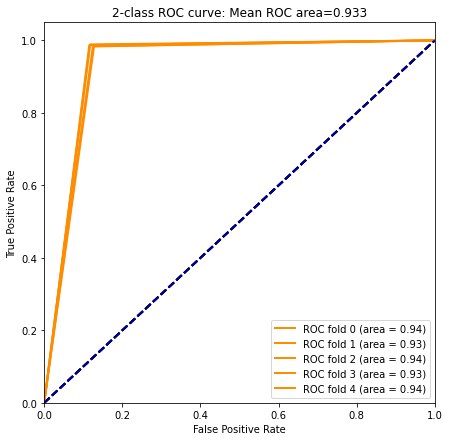

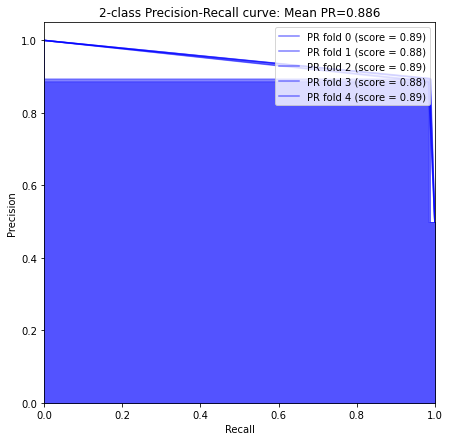

In [53]:
# кросс-валидация XGBoost на полном наборе данных:
gbm = xgb.XGBClassifier()
y_scores, y_tests = KFold(gbm, x_data, y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)

(44432, 212)
(11108, 212)
(44432, 212)
(11108, 212)
(44432, 212)
(11108, 212)
(44432, 212)
(11108, 212)
(44432, 212)
(11108, 212)
mean f1 : 0.721909132624359


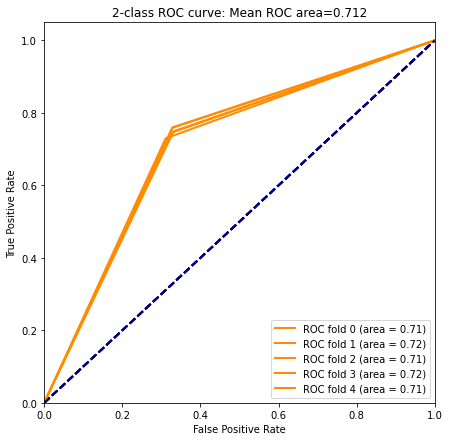

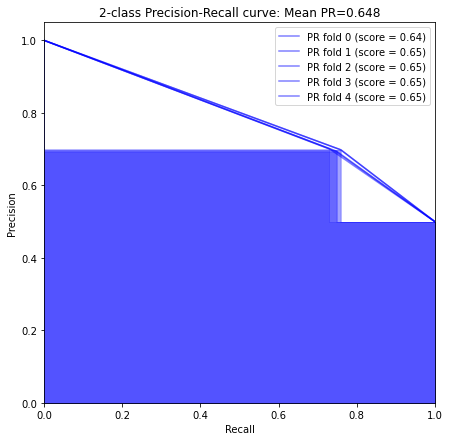

In [54]:
# градиентный бустинг для примера с прошлой недели:
gradBoost = ensemble.GradientBoostingClassifier()
y_scores, y_tests = KFold(gradBoost, x_data, y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)

In [58]:
#Очевидно, что XGBoost лучше себя показал. Есть страх переобученности модели, но посмотрим по результатам, обучения и прогнозе для kaggle

In [56]:
# обучение и прогноз для Kaggle

gbm = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1).fit(x_data, y_data)
pred_answers = gbm.predict(x_test_kaggle)
answers = pd.DataFrame({'ID':range(0, len(pred_answers)), 'result':pred_answers})
answers.to_csv('./answers_XGBoost_18_06.csv', sep = ',', index=False)